## Load Data

In [3]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


## Ckeck Data

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


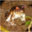

In [6]:
from PIL import Image as im

image_list = []

for i in range(20):
  image_array = x_train[i]
  image_array = image_array.reshape(32,32,3)
  image_list.append(im.fromarray(image_array, mode='RGB'))

image_list[0]

In [12]:
item_map = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
item_map[y_train[0][0]]

'frog'

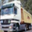

In [13]:
image_list[1]

In [14]:
item_map[y_train[1][0]]

'truck'

## Setup Model

In [18]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, 5, activation='relu', padding='same', input_shape=(32,32,3)),
  tf.keras.layers.MaxPooling2D(pool_size=(3, 3),strides=(2, 2), padding='same'),
  tf.keras.layers.Conv2D(64, 5, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(3, 3),strides=(2, 2), padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(384, activation='relu'),
  tf.keras.layers.Dense(192, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10)
])
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

## Train

In [19]:
model.compile(optimizer='adam',
        loss=loss_fn,
        metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 320s 204ms/step - loss: 2.2798 - accuracy: 0.1995
Epoch 2/5
1563/1563 [==============================] - 317s 203ms/step - loss: 1.7421 - accuracy: 0.3681
Epoch 3/5
1563/1563 [==============================] - 316s 202ms/step - loss: 1.5824 - accuracy: 0.4314
Epoch 4/5
1563/1563 [==============================] - 317s 203ms/step - loss: 1.4845 - accuracy: 0.4714
Epoch 5/5
1563/1563 [==============================] - 314s 201ms/step - loss: 1.4117 - accuracy: 0.4996


## Evalute

In [20]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 17s - loss: 1.5125 - accuracy: 0.4515 - 17s/epoch - 53ms/step


[1.5124928951263428, 0.4514999985694885]

## Improve Performance by Data Augmentation

In [108]:
import numpy as np

def data_augmentation(image):
  image = tf.image.random_crop(image, [28, 28, 3])
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_flip_up_down(image)
  image = tf.image.random_brightness(image, 63)
  image = tf.image.random_contrast(image, 0.2, 1.8)
  return image.numpy()


def get_batch(x_train, y_train, batch_size):
  t = int(x_train.shape[0]/batch_size)+1
  for i in range(t):
    x_train_aug = data_augmentation(x_train[i*batch_size]).reshape((1, 28, 28, 3))
    for image in x_train[i*batch_size+1:(i+1)*batch_size,:]:
      x_train_aug = np.append(x_train_aug,data_augmentation(image).reshape((1, 28, 28, 3)), axis=0)
    yield x_train_aug, y_train[i*batch_size:(i+1)*batch_size]

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, 5, activation='relu', padding='same', input_shape=(28,28,3)),
  tf.keras.layers.MaxPooling2D(pool_size=(3, 3),strides=(2, 2), padding='same'),
  tf.keras.layers.Conv2D(64, 5, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(3, 3),strides=(2, 2), padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(384, activation='relu'),
  tf.keras.layers.Dense(192, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10)
])
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer='adam',
        loss=loss_fn,
        metrics=['accuracy'])

ds_generator = tf.data.Dataset.from_generator(get_batch, args=[x_train, y_train, 32], output_types=(tf.uint8, tf.uint8), output_shapes = ([None, 28, 28, 3],[None, 1]) )

model.fit(ds_generator, epochs=10)

Epoch 1/10
    292/Unknown - 91s 309ms/step - loss: 3.3538 - accuracy: 0.1006

In [ ]:
model.evaluate(x_test, y_test, verbose=2)